# Deep Reinforcement Learning --- Assignment 1

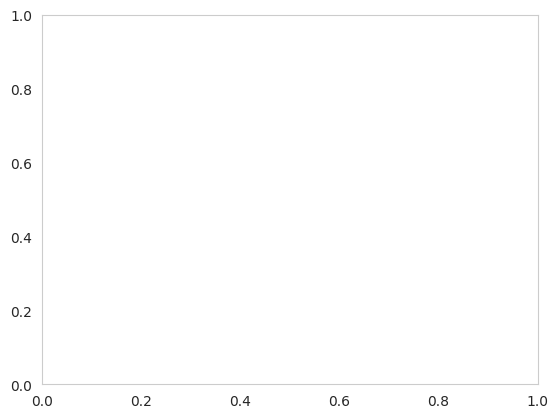

In [1]:
from random import random

import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from IPython.display import Video, display
import os

plt.grid(False)

class Cell:
  cellType = 0
  def __init__(self, cellType=0, reward=0, available=True, terminal=False):
    self.reward = reward
    self.walls = 0
    self.cellType = cellType
    self.available = available
    self.terminal = terminal

  def __str__(self):
    return self.cellType

class Sprite:
  def __init__(self, img, mask):
    self.img = img
    self.mask = mask
    self.width, self.height, _ = img.shape

  def draw(self, img, position):
    img[position[1] : position[1]+self.height, position[0] : position[0]+self.height] &= self.mask
    img[position[1] : position[1]+self.height, position[0] : position[0]+self.height] |= self.img

class Maze:
  def __init__(self, maze, colors, player, background, resolution, epsilon=0):
    self.maze = maze
    self.colors = colors
    self.player = player
    self.resolution = resolution
    self.epsilon=epsilon
    self.background = background
    self.mazeHeight, self.mazeWidth = maze.shape
    self.imgWidth = self.mazeWidth * self.resolution
    self.imgHeight = self.mazeHeight * self.resolution
    self.reset()

  def reset(self, fixedPosition=True):
    self.reward = 0.0
    self.cumulativeReward = 0.0
    self.steps = 0
    self.x = 1*fixedPosition
    self.y = 1*fixedPosition
    while(not self.maze[self.y, self.x].available):
      self.x = np.random.randint(1, self.mazeWidth)
      self.y = np.random.randint(1, self.mazeHeight)
    self.replay_path = []
    self.replay_path.append((self.y, self.x))

  def info(self):
    info = dict()
    info["dimensions"] = self.maze.shape
    info["epsilon"] = self.epsilon
    info["actions"] = (1, 2, 4, 8)
    return info

  def render(self):
    border = 10
    img = self.background.copy()
    self.player.draw(img, (self.x*self.resolution, self.y*self.resolution))
    img = img[self.resolution-border: -self.resolution+border, self.resolution-border: -self.resolution+border]
    return img

  def display(self):
    plt.imshow(self.render())
    plt.show()

  def showReplay(self):
    video_path = "tmp.mp4"
    video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*"mp4v"), 10.0, (env.render().shape[1::-1]))
    for pos in self.replay_path:
      self.y, self.x = pos
      video.write(env.render())
    video.release()
    fileToDisplay = "video.mp4"
    os.system(f"ffmpeg -loglevel quiet -y -i {video_path} -vcodec libx264 -x264opts keyint=123:min-keyint=120 -an {fileToDisplay}")
    display(Video(fileToDisplay, embed=True))

  def action(self, dir):
    dir_e = int((np.random.randint(1,3)<<2)/((dir|dir>>1)&5)*(np.random.random()<self.epsilon))
    dir = dir*(not dir_e) | dir_e
    x=self.x + (dir&1) - (dir>>1&1)
    y=self.y + (dir>>2&1) - (dir>>3&1)
    self.x=x*self.maze[y, x].available + self.x*(not self.maze[y, x].available)
    self.y=y*self.maze[y, x].available + self.y*(not self.maze[y, x].available)
    self.replay_path.append((self.y, self.x))
    return dir

  def state(self, lastAction = 0):
    done = self.maze[self.y, self.x].terminal
    reward = self.maze[self.y, self.x].reward
    info = self.info()
    return (self.y, self.x), lastAction, reward, done

  def step(self, action):
    action = self.action(action)
    return self.state(action)


# The environment
The environment was defined in the Maze class.<br><br>
## The most important elements:
### State
State is returned by methods step(action) and state().<br>
State consists of 5 values:
* position, lastAction, reward, done, info*:
* position --- tuple of two real numbers (y, x),
* lastAction --- last action passed to step(),
* reward --- real number,
* done --- boolean value: True if game is over,

### Info
Method *info()* returns a dictionary containing information about the environment,
 * dimensions --- shape of the environment,
 * epsilon --- the probability of taking a random step,
 * actions --- available actions.

### Action
Action is determined by value: 1, 2, 4 or 8:
*   1 --- right,
*   2 --- left,
*   4 --- down,
*   8 --- up.

### Reset
reset(fixedPosition=True) resets the eivironment.<br>
fixedPosition:
* True --- agent starts at position 1, 1
* False --- agent starts at random position

### Visualisation
* display() --- display image of actual environment state
* showReplay() --- display video of the last game

# Loading environment
**Put your ID in the *student_id* variable**

---



In [2]:
from urllib.request import urlopen
import pickle

def download_dataset(filename):
  base_url =f"https://github.com/pa-k/DRL2022/blob/main/DRL_assignment1/{filename}?raw=true"
  url = urlopen(base_url)
  binary_data = url.read()
  with open(filename, "wb") as f:
    f.write(binary_data)

def loadEnv(student_id):
  file_id = student_id%5
  filename = f"DRL_a{file_id}.pickle"
  if not os.path.exists(filename):
    download_dataset(filename)
  with open(filename, 'rb') as file2:
    env = pickle.load(file2)
  return env

student_id = 184266    #Your id
env = loadEnv(student_id)


# Printing environment and the state details

In [3]:
info = env.info()
print("info", info)
print("environment dimensions", info["dimensions"])
print("probability of random step", info["epsilon"])
print("allowed actions", info["actions"])

actPos, action, reward, done = env.state()
print("\nagent position", actPos)
print("performed action", action)
print("last reward", reward)
print("the game is over", done)

info {'dimensions': (7, 8), 'epsilon': 0.0, 'actions': (1, 2, 4, 8)}
environment dimensions (7, 8)
probability of random step 0.0
allowed actions (1, 2, 4, 8)

agent position (1, 1)
performed action 0
last reward 0
the game is over False


# Visualization examples

## Example 1:
### Print environment status and display visualization in four steps: right, right, left, down

((1, 1), 0, 0, False)


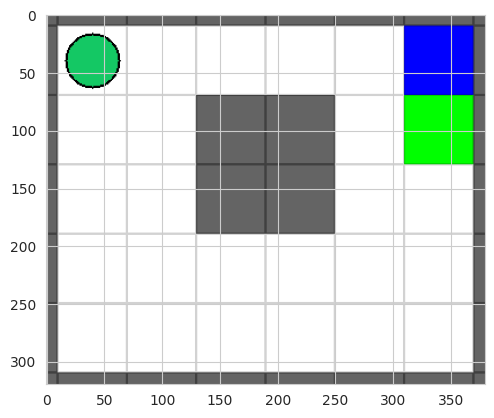



 ((1, 2), 1, 0, False)


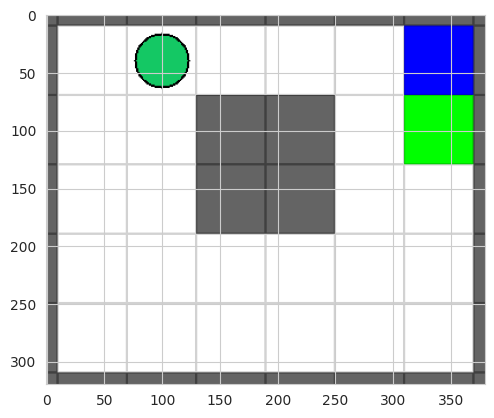



 ((1, 3), 1, 0, False)


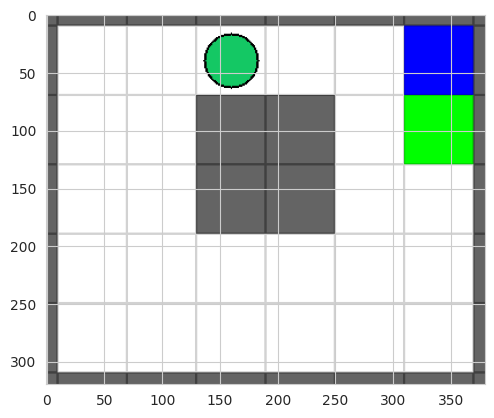



 ((1, 2), 2, 0, False)


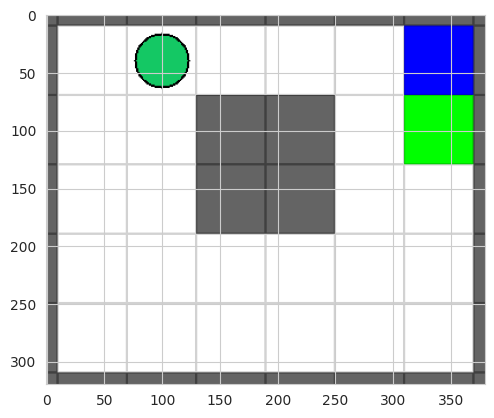



 ((2, 2), 4, 0, False)


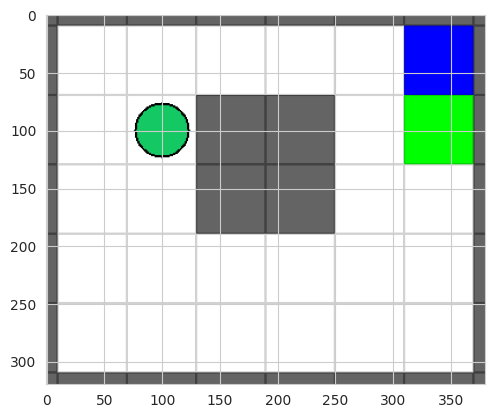

[(1, 1), (1, 2), (1, 3), (1, 2), (2, 2)]


In [4]:
steps = [1, 1, 2, 4] # right, right, left, down
env.reset()
print(env.state())
env.display()
for step in steps:
  state = env.step(step)
  print("\n\n", state)
  env.display()
print(env.replay_path)

## Example 2:
### Generating a video of last game

In [5]:
  env.reset()
  env.step(1) # right
  env.step(8) # up
  env.step(4) # down
  env.step(2) # left
  env.step(8) # up
  env.step(1) # right
  env.step(1) # right
  env.step(1) # right
  env.step(1) # right
  env.step(1) # right
  env.showReplay()

## Example 3:
### Simple random agent with Visualization

In [6]:
class RandomAgent:
  def __init__(self, actions):
    self.actions = actions

  def play(self, state):
    return np.random.choice(self.actions)

env.reset()
info = env.info()
state = env.state()
agent = RandomAgent(info["actions"])
for step in range(300):
  action = agent.play(state)
  state = env.step(action)
  if state[3] == True:
    break
env.showReplay()
if(state[2]>0):
  print("Yupi :)")
if(state[2]<0):
  print(":<")

Yupi :)


# PL
### Zadanie 1 --- max 20 p.

Zaimplementuj algorytm Monte-Carlo do uczenia wartość *V*.<br>
Kluczowe elementy:
* Implementacja tablicy wartości *V*.
* Opracowanie funkcji wyboru najlepszej akcji na podstawie tablicy wartości *V*.
* Implementacja algorytmu aktualizacji tablicy wartości *V* na podstawie zebranych epizodów.
* Implementacja dwóch metody eksploracji: e-greedy + inna metoda.
* Dobór długości epizodów, liczby epizodów i epok.

Przetestuj uczenie:
* bez kary za krok,
* z karą -0.1 za krok,
* zaproponuj własną karę za krok i inne usprawnienia.

Jak kara za krok wpływa na zaimplementowaną motodę uczenia wartości *V*?<br>
Przedstaw wyniki oraz wnioski z uczenia wartości *V* metodą Monte-Carlo.

# Eng
### Assignment 1 --- max 20 p.
Implement the Monte Carlo algorithm for learning the *V-value* function.<br>
Key elements:
* V-value array implementation.
* Development of a function to choose the best action based on the V-value array.
* Implementation of an algorithm to update the *V-values* based on the collected episodes.
* Implementation of the two exploration methods: e-greedy + other method.
* Selection of the maximum length of episodes, number of episodes and epochs.

Test learning:
* without step penalty,
* with -0.1 penalty per step,
* suggest your own step penalty and other improvements.

How does the step penalty affect the implemented V learning method? <br>
Present the results and conclusions from learning the V-values using the Monte-Carlo method.

# My Solution

In [7]:
from enum import IntEnum
import seaborn as sns
from tqdm import tqdm

EAST = 1
WEST = 2
SOUTH = 4
NORTH = 8


class Explorations(IntEnum):
  EPSILON = 0
  SOFTMAX = 1


class Monte_Carlo_agent:
  def __init__(self, env, exploration_method=Explorations.EPSILON, gamma=0.9, epsilon=0.2, penalty=0.0, epsilon_retention=0.0):
    self.environment = env
    self.env_shape = self.environment.info()["dimensions"]
    self.actions = self.environment.info()["actions"]
    self.v_table = [[0.0]*self.env_shape[1] for _ in range(self.env_shape[0])]
    self.gamma = gamma
    self.epsilon = epsilon
    self.penalty = penalty
    self.number_of_passes = 0.0
    match exploration_method:
      case Explorations.EPSILON:
        self.choose_action_method = self.choose_action_epsilon
      case Explorations.SOFTMAX:
        self.choose_action_method = self.choose_action_softmax
      case _:
        raise NotImplementedError
    self.epsilon_retention = epsilon_retention


  def choose_action_epsilon(self, sorted_actions):
    if np.random.rand() < self.epsilon:
        return np.random.choice(self.actions)
    best_action = list(sorted_actions.keys())[0]
    best_actions = []
    for action, value in sorted_actions.items():
        if value == sorted_actions[best_action]:
            best_actions.append(action)
    return np.random.choice(best_actions)


  def choose_action_softmax(self, sorted_actions):
    divider_sum = np.sum(np.exp(list(sorted_actions.values())))
    probabilities = { action: np.exp(value)/divider_sum for action, value in sorted_actions.items()}
    return np.random.choice(list(probabilities.keys()), p=list(probabilities.values()))


  def decide(self, position):
    (x, y) = position
    possible_actions = {EAST: self.v_table[x][y+1],
                        WEST: self.v_table[x][y-1],
                        SOUTH: self.v_table[x+1][y],
                        NORTH: self.v_table[x-1][y]}
    sorted_best_to_worst_actions = dict(sorted(possible_actions.items(),
                          key=lambda item: item[1], reverse=True))
    return self.choose_action_method(sorted_best_to_worst_actions)


  def perform_run(self, max_run_length=100):
    for i in range(max_run_length):
      action = self.decide(self.environment.state()[0])
      state_after_action = self.environment.step(action)
      if state_after_action[3] == True:
          return state_after_action[2]
    return self.environment.state()[2]


  def update_v(self, states, reward):
    G = reward - self.penalty
    self.number_of_passes += 1.0
    last_step_x, last_step_y = states[-1]
    if reward != 0:
        self.v_table[last_step_x][last_step_y] = reward
    else:
      self.v_table[last_step_x][last_step_y] +=  (G - self.v_table[last_step_x][last_step_y])/self.number_of_passes
    for (x, y) in states[-2::-1]:
      G = self.penalty + self.gamma*G
      self.v_table[x][y] += (G - self.v_table[x][y])/self.number_of_passes


  def train(self, number_of_epochs=5, number_of_episodes=100, max_run_length=100):
    for epoch in range(number_of_epochs):
        print(f"Starting epoch {epoch}/{number_of_epochs}")
        for _ in tqdm(range(number_of_episodes)):
          self.environment.reset()
          reward = self.perform_run(max_run_length)
          self.update_v(self.environment.replay_path, reward)
          self.epsilon *= 1 - self.epsilon_retention
          self.epsilon = max(self.epsilon, 0.01)


  def fit(self):
    self.environment.reset()
    self.perform_run()


  def show_last_replay(self):
    self.environment.showReplay()

  def plot_v_heatmap(self):
    data = np.array(self.v_table)
    sns.heatmap(data, annot=True, square=True, linewidth=.5)
    plt.title("V table values")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()


## Implementacja
Zaimplementowano agenta Monte-carlo z możliwościami eksploracji epsilon-zachłanne i softmax. Specjalną zmianą było dodanie możliwości zmniejszenia epsilon wraz z kolejnymi epizodami.

### 1 przypadek - zero kar epsilon-zachłanny
Agent znajduje drogę, ale bardzo okrężną, omijającą pole z karą -1

Starting epoch 0/5


100%|██████████| 100/100 [00:00<00:00, 1703.99it/s]


Starting epoch 1/5


100%|██████████| 100/100 [00:00<00:00, 3657.08it/s]


Starting epoch 2/5


100%|██████████| 100/100 [00:00<00:00, 3896.64it/s]


Starting epoch 3/5


100%|██████████| 100/100 [00:00<00:00, 4112.71it/s]


Starting epoch 4/5


100%|██████████| 100/100 [00:00<00:00, 4223.45it/s]


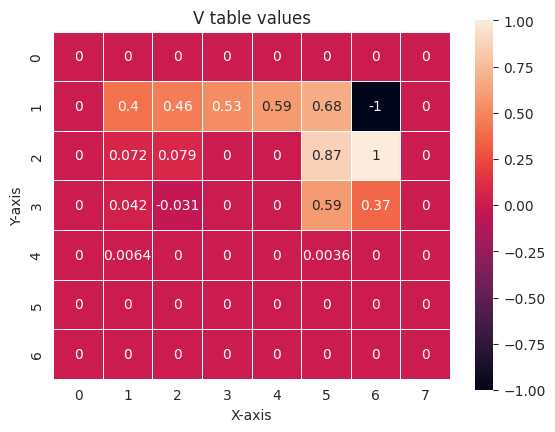

In [8]:
#no penalty epsilon
agent_no_penalty = Monte_Carlo_agent(env, gamma=0.9, penalty=0.0)
agent_no_penalty.train(number_of_epochs=5,number_of_episodes=100, max_run_length=100)
agent_no_penalty.plot_v_heatmap()

Starting epoch 0/5


100%|██████████| 100/100 [00:00<00:00, 239.60it/s]


Starting epoch 1/5


100%|██████████| 100/100 [00:00<00:00, 242.62it/s]


Starting epoch 2/5


100%|██████████| 100/100 [00:00<00:00, 284.58it/s]


Starting epoch 3/5


100%|██████████| 100/100 [00:00<00:00, 299.10it/s]


Starting epoch 4/5


100%|██████████| 100/100 [00:00<00:00, 269.44it/s]


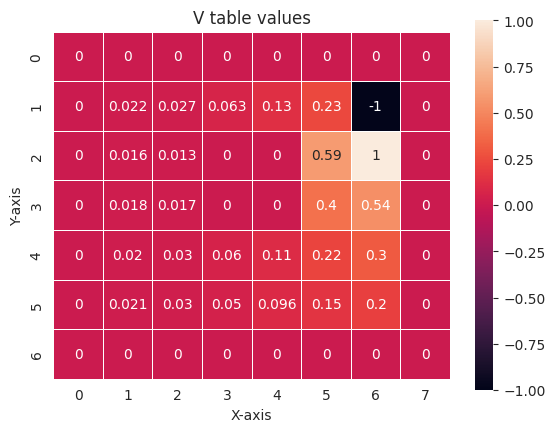

In [10]:
#no penalty softmax
agent = Monte_Carlo_agent(env, exploration_method=Explorations.SOFTMAX, gamma=0.9, penalty=0.0)
agent.train(number_of_epochs=5,number_of_episodes=100, max_run_length=100)
agent.plot_v_heatmap()

Starting epoch 0/5


100%|██████████| 100/100 [00:00<00:00, 362.26it/s]


Starting epoch 1/5


100%|██████████| 100/100 [00:00<00:00, 382.60it/s]


Starting epoch 2/5


100%|██████████| 100/100 [00:00<00:00, 376.78it/s]


Starting epoch 3/5


100%|██████████| 100/100 [00:00<00:00, 352.11it/s]


Starting epoch 4/5


100%|██████████| 100/100 [00:00<00:00, 371.51it/s]


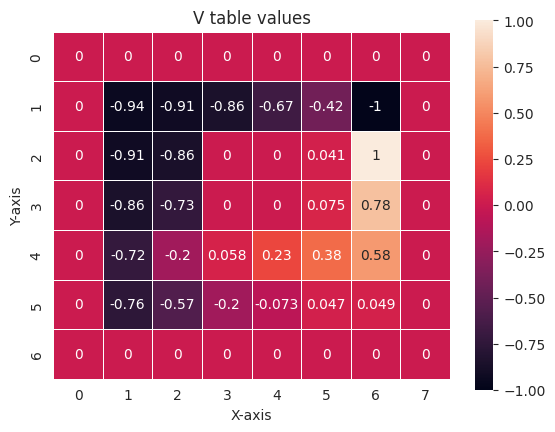

In [12]:
#-0.1 penalty epsilon
agent_no_penalty = Monte_Carlo_agent(env, gamma=0.9, penalty=-0.1)
agent_no_penalty.train(number_of_epochs=5,number_of_episodes=100, max_run_length=100)
agent_no_penalty.plot_v_heatmap()

Starting epoch 0/5


100%|██████████| 100/100 [00:00<00:00, 300.07it/s]


Starting epoch 1/5


100%|██████████| 100/100 [00:00<00:00, 283.24it/s]


Starting epoch 2/5


100%|██████████| 100/100 [00:00<00:00, 314.38it/s]


Starting epoch 3/5


100%|██████████| 100/100 [00:00<00:00, 287.36it/s]


Starting epoch 4/5


100%|██████████| 100/100 [00:00<00:00, 313.72it/s]


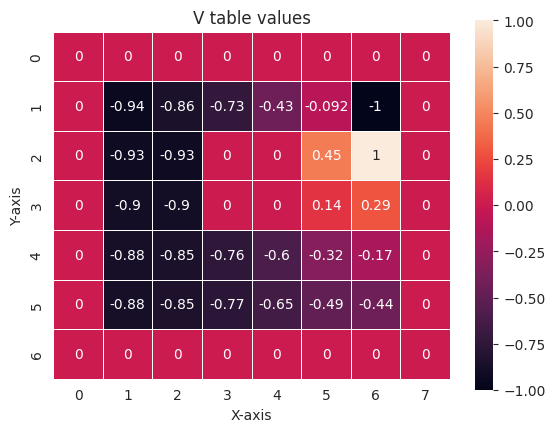

In [13]:
#-0.1 softmax
agent = Monte_Carlo_agent(env, exploration_method=Explorations.SOFTMAX, gamma=0.9, penalty=-0.1)
agent.train(number_of_epochs=5,number_of_episodes=100, max_run_length=100)
agent.plot_v_heatmap()

Starting epoch 0/5


100%|██████████| 100/100 [00:00<00:00, 1016.22it/s]


Starting epoch 1/5


100%|██████████| 100/100 [00:00<00:00, 3807.40it/s]


Starting epoch 2/5


100%|██████████| 100/100 [00:00<00:00, 3424.87it/s]


Starting epoch 3/5


100%|██████████| 100/100 [00:00<00:00, 3964.03it/s]


Starting epoch 4/5


100%|██████████| 100/100 [00:00<00:00, 3594.55it/s]


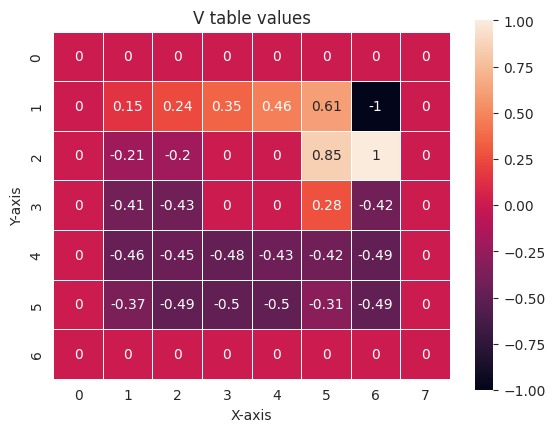

In [14]:
#-0.05 penalty epsilon
agent_no_penalty = Monte_Carlo_agent(env, gamma=0.9, penalty=-0.05)
agent_no_penalty.train(number_of_epochs=5,number_of_episodes=100, max_run_length=100)
agent_no_penalty.plot_v_heatmap()

Starting epoch 0/5


100%|██████████| 100/100 [00:00<00:00, 275.61it/s]


Starting epoch 1/5


100%|██████████| 100/100 [00:00<00:00, 272.22it/s]


Starting epoch 2/5


100%|██████████| 100/100 [00:00<00:00, 282.71it/s]


Starting epoch 3/5


100%|██████████| 100/100 [00:00<00:00, 292.91it/s]


Starting epoch 4/5


100%|██████████| 100/100 [00:00<00:00, 316.76it/s]


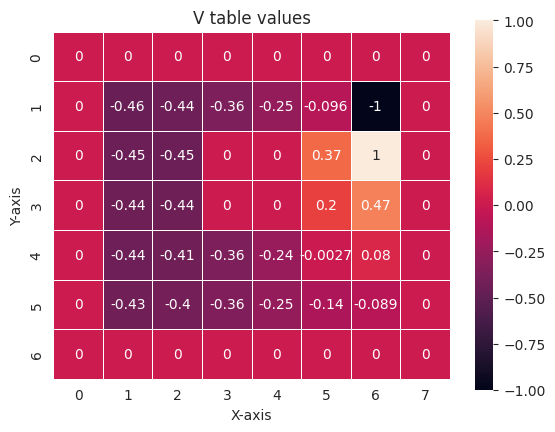

In [15]:
#-0.05 softmax
agent = Monte_Carlo_agent(env, exploration_method=Explorations.SOFTMAX, gamma=0.9, penalty=-0.05)
agent.train(number_of_epochs=5,number_of_episodes=100, max_run_length=100)
agent.plot_v_heatmap()

Starting epoch 0/5


100%|██████████| 100/100 [00:00<00:00, 901.19it/s]


Starting epoch 1/5


100%|██████████| 100/100 [00:00<00:00, 4546.33it/s]


Starting epoch 2/5


100%|██████████| 100/100 [00:00<00:00, 4767.45it/s]


Starting epoch 3/5


100%|██████████| 100/100 [00:00<00:00, 5047.78it/s]


Starting epoch 4/5


100%|██████████| 100/100 [00:00<00:00, 4990.78it/s]


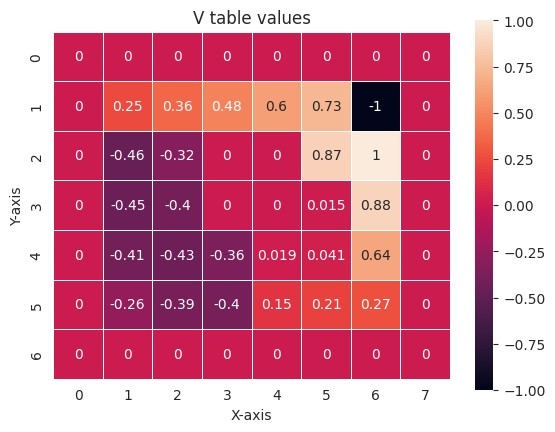

In [16]:
#-0.05 penalty epsilon retaining
agent_no_penalty = Monte_Carlo_agent(env, gamma=0.9, penalty=-0.05, epsilon_retention=0.01)
agent_no_penalty.train(number_of_epochs=5,number_of_episodes=100, max_run_length=100)
agent_no_penalty.plot_v_heatmap()

Starting epoch 0/5


100%|██████████| 100/100 [00:00<00:00, 328.55it/s]


Starting epoch 1/5


100%|██████████| 100/100 [00:00<00:00, 320.44it/s]


Starting epoch 2/5


100%|██████████| 100/100 [00:00<00:00, 310.24it/s]


Starting epoch 3/5


100%|██████████| 100/100 [00:00<00:00, 349.41it/s]


Starting epoch 4/5


100%|██████████| 100/100 [00:00<00:00, 299.05it/s]


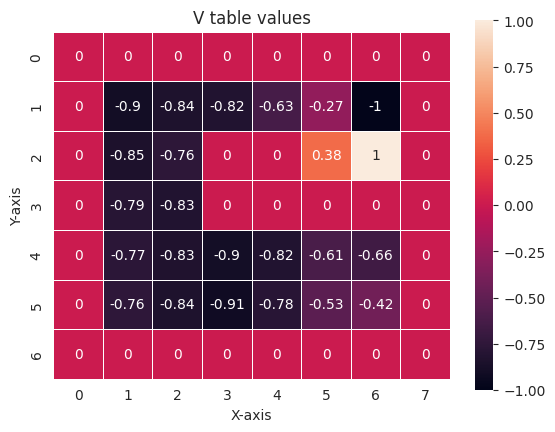

In [19]:
#-0.05 penalty epsilon retaining
agent_no_penalty = Monte_Carlo_agent(env, gamma=0.9, penalty=-0.1, epsilon_retention=0.01)
agent_no_penalty.train(number_of_epochs=5,number_of_episodes=100, max_run_length=100)
agent_no_penalty.plot_v_heatmap()